## Extract Data Points Using OpenCV 

In [31]:
import os
import certifi

# Set the SSL_CERT_FILE environment variable
os.environ['SSL_CERT_FILE'] = certifi.where()

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

print(cv2.__version__)
print(np.__version__)
print(matplotlib.__version__)

4.8.0
1.26.3
3.7.3


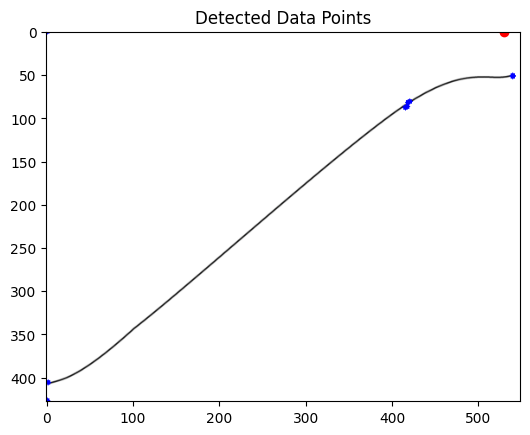

Detected data points (pixel coordinates):
(1, 427)
(417, 87)
(539, 51)
(418, 82)
(2, 406)
(1, 0)
(2, 406)
(420, 81)
(539, 52)
(415, 88)


In [219]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Error: The file {image_path} does not exist or could not be read.")
    return image

def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply histogram equalization
    equalized = cv2.equalizeHist(gray)
    # Reduce Gaussian blur kernel size to retain more details
    blurred = cv2.GaussianBlur(equalized, (3, 3), 0)
    # Use adaptive thresholding with adjusted parameters
    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    # Apply morphological operations to enhance features
    kernel = np.ones((2, 2), np.uint8)  # Smaller kernel size
    morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    return morph

def detect_edges(image):
    edges = cv2.Canny(image, 50, 150)
    return edges

def detect_contours(thresh):
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    return contours

def filter_data_points(contours, image):
    data_points = []
    for contour in contours:
        if cv2.contourArea(contour) > 1:  # Lowered the area threshold further
            # Approximate the contour to reduce the number of points
            epsilon = 0.005 * cv2.arcLength(contour, True)  # Reduced epsilon for finer approximation
            approx = cv2.approxPolyDP(contour, epsilon, True)
            for point in approx:
                cX, cY = point[0]
                data_points.append((cX, cY))
                cv2.circle(image, (cX, cY), 3, (255, 0, 0), -1)  # Smaller circle size for more points
    return data_points

def main():
    try:
        # Load the image
        image_path = '/notebooks/Fitted Growth Curves for butterhead lettuce.png'
        image = load_image(image_path)

        # Preprocess the image
        thresh = preprocess_image(image)

        # Detect edges
        edges = detect_edges(thresh)

        # Detect contours
        contours = detect_contours(edges)

        # Filter out small contours that are unlikely to be data points
        data_points = filter_data_points(contours, image)

        # Display the image with detected data points
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Detected Data Points')
        plt.scatter(530, 0, color='red', marker='o')
        plt.show()

        # Print the coordinates of the detected data points
        print("Detected data points (pixel coordinates):")
        for (cX, cY) in data_points:
            print(f"({cX}, {cY})")

    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    main()

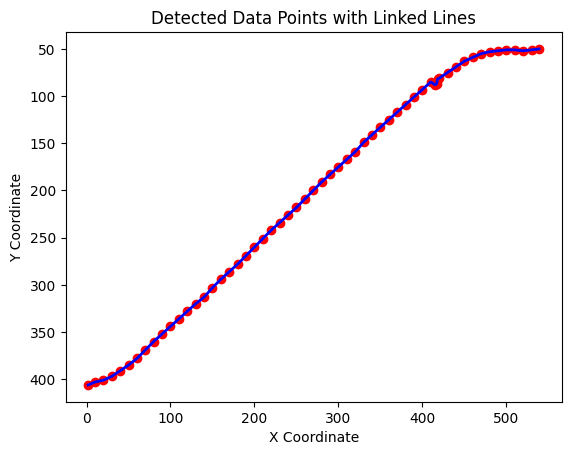

In [191]:
import matplotlib.pyplot as plt
import numpy as np

def plot_detected_points(data_points):
    # Extract x and y coordinates from data points
    x_coords = [point[0] for point in data_points]
    y_coords = [point[1] for point in data_points]

    # Create a scatter plot
    plt.scatter(x_coords, y_coords, color='red', marker='o')

    # Link up the points by plotting lines between consecutive points
    plt.plot(x_coords, y_coords, color='blue', linestyle='-', linewidth=2)

    # Set plot title and labels
    plt.title('Detected Data Points with Linked Lines')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')

    # Display the plot
    plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates
    plt.show()

# Example usage with detected data points
data_points = [(2, 406), (10, 403), (20,401), (30, 397), (40, 391), (50, 385), (60, 378), (70, 369), (80, 360), (90, 352),
               (100, 344), (110, 336), (120, 328), (130, 320), (140, 313), (150, 303), (160, 294), (170, 286), (180, 278),
               (190, 269), (200, 260), (210, 251), (220, 242), (230, 234), (240, 226), (250, 218), (260, 209), (270, 200),
               (280, 191), (290, 183), (300, 175), (310, 167), (320, 159), (330, 149), (340, 141), (350, 133), (360, 125),
               (370, 117), (380, 109), (390, 101), (400, 93), (410, 85), (415, 88), (417, 87), (418, 82), (420, 81), 
               (430, 75), (440, 69), (450, 63), (460, 59), (470, 55), (480, 53), (490, 52), (500, 51), (510, 51), (520, 52),
               (530, 51), (539, 50)] 
plot_detected_points(data_points)

In [189]:
import csv

def write_points_to_csv(data_points, filename):
    with open(filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['X Coordinate', 'Y Coordinate'])
        writer.writerows(data_points)


# Write the data points to a CSV file
write_points_to_csv(data_points, '/notebooks/Points of Plant Sigmoid Growth Curve.csv')

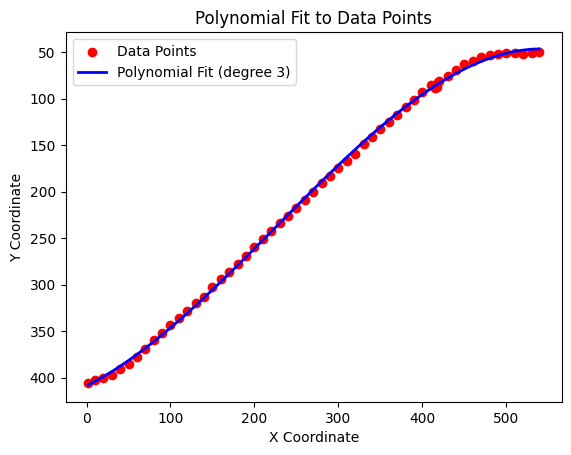

Polynomial formula (degree 3):
           3            2
3.041e-06 x - 0.002054 x - 0.4489 x + 408.9
[203.0, 40.3, 20.05, 13.233333333333333, 9.775, 7.7, 6.3, 5.271428571428571, 4.5, 3.911111111111111, 3.44, 3.0545454545454547, 2.7333333333333334, 2.4615384615384617, 2.2357142857142858, 2.02, 1.8375, 1.6823529411764706, 1.5444444444444445, 1.4157894736842105, 1.3, 1.1952380952380952, 1.1, 1.017391304347826, 0.9416666666666667, 0.872, 0.8038461538461539, 0.7407407407407407, 0.6821428571428572, 0.6310344827586207, 0.5833333333333334, 0.5387096774193548, 0.496875, 0.45151515151515154, 0.4147058823529412, 0.38, 0.3472222222222222, 0.3162162162162162, 0.2868421052631579, 0.258974358974359, 0.2325, 0.2073170731707317, 0.21204819277108433, 0.20863309352517986, 0.19617224880382775, 0.19285714285714287, 0.1744186046511628, 0.15681818181818183, 0.14, 0.1282608695652174, 0.11702127659574468, 0.11041666666666666, 0.10612244897959183, 0.102, 0.1, 0.1, 0.09622641509433963, 0.09276437847866419]
[-203

In [205]:
import numpy as np
import matplotlib.pyplot as plt

def fit_and_plot_polynomial(data_points, degree=3):
    # Extract x and y coordinates from data points
    x_coords = [point[0] for point in data_points]
    y_coords = [point[1] for point in data_points]

    # Fit a polynomial of the specified degree to the data points
    coefficients = np.polyfit(x_coords, y_coords, degree)
    polynomial = np.poly1d(coefficients)

    # Generate x values for plotting the polynomial
    x_line = np.linspace(min(x_coords), max(x_coords), 100)
    y_line = polynomial(x_line)

    # Plot the original data points
    plt.scatter(x_coords, y_coords, color='red', marker='o', label='Data Points')

    # Plot the fitted polynomial
    plt.plot(x_line, y_line, color='blue', linestyle='-', linewidth=2, label=f'Polynomial Fit (degree {degree})')

    # Set plot title and labels
    plt.title('Polynomial Fit to Data Points')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')

    # Display the plot
    plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates
    plt.legend()
    plt.show()

    # Print the polynomial formula
    print(f"Polynomial formula (degree {degree}):")
    print(polynomial)

# Example usage with detected data points
data_points = [(2, 406), (10, 403), (20, 401), (30, 397), (40, 391), (50, 385), (60, 378), (70, 369), (80, 360), (90, 352),
               (100, 344), (110, 336), (120, 328), (130, 320), (140, 313), (150, 303), (160, 294), (170, 286), (180, 278),
               (190, 269), (200, 260), (210, 251), (220, 242), (230, 234), (240, 226), (250, 218), (260, 209), (270, 200),
               (280, 191), (290, 183), (300, 175), (310, 167), (320, 159), (330, 149), (340, 141), (350, 133), (360, 125),
               (370, 117), (380, 109), (390, 101), (400, 93), (410, 85), (415, 88), (417, 87), (418, 82), (420, 81), 
               (430, 75), (440, 69), (450, 63), (460, 59), (470, 55), (480, 53), (490, 52), (500, 51), (510, 51), (520, 52),
               (530, 51), (539, 50)] 

# Fit a polynomial and plot the formula
fit_and_plot_polynomial(data_points, degree=3)

# Calculate the ratio of y:x at each point
ratio = [y / x for x, y in data_points]
print(ratio)

newratio = [-r for r in ratio]
print(newratio)


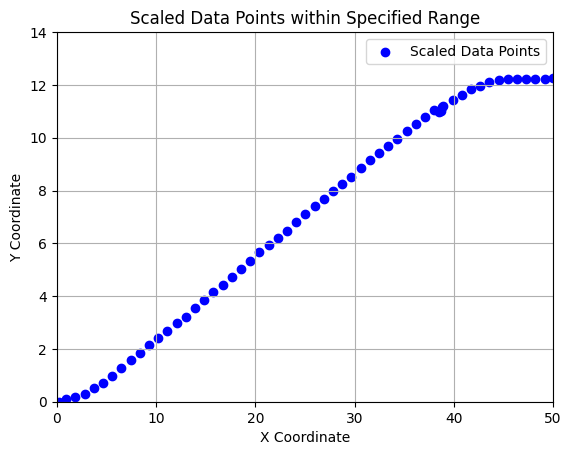

In [225]:
import numpy as np
import matplotlib.pyplot as plt

# Example usage with detected data points
data_points = [(2, 406), (10, 403), (20, 401), (30, 397), (40, 391), (50, 385), (60, 378), (70, 369), (80, 360), (90, 352),
               (100, 344), (110, 336), (120, 328), (130, 320), (140, 313), (150, 303), (160, 294), (170, 286), (180, 278),
               (190, 269), (200, 260), (210, 251), (220, 242), (230, 234), (240, 226), (250, 218), (260, 209), (270, 200),
               (280, 191), (290, 183), (300, 175), (310, 167), (320, 159), (330, 149), (340, 141), (350, 133), (360, 125),
               (370, 117), (380, 109), (390, 101), (400, 93), (410, 85), (415, 88), (417, 87), (418, 82), (420, 81), 
               (430, 75), (440, 69), (450, 63), (460, 59), (470, 55), (480, 53), (490, 52), (500, 51), (510, 51), (520, 52),
               (530, 51), (539, 50)] 

# Scale data points to fit within the new x and y ranges
refined_data_points = [(x / 539 * 50, y / 406 * 14) for x, y in data_points]

# Generate new x and y values from refined data points
new_x_values = [x for x, _ in refined_data_points]
new_y_values = [y for _, y in refined_data_points]

# Invert the y-values to convert the curve back
new_y_values = [14 - y for y in new_y_values]

# Create the plot
plt.scatter(new_x_values, new_y_values, label='Scaled Data Points', color='blue', marker='o')

# Set the x and y axis limits
plt.xlim(0, 50)
plt.ylim(0, 14)

# Set plot title and labels
plt.title('Scaled Data Points within Specified Range')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

# Add a grid
plt.grid(True)

# Add a legend
plt.legend()

# Display the plot
plt.show()

Polynomial formula:
            3            2
-0.0001314 x + 0.008231 x + 0.1669 x - 0.09899


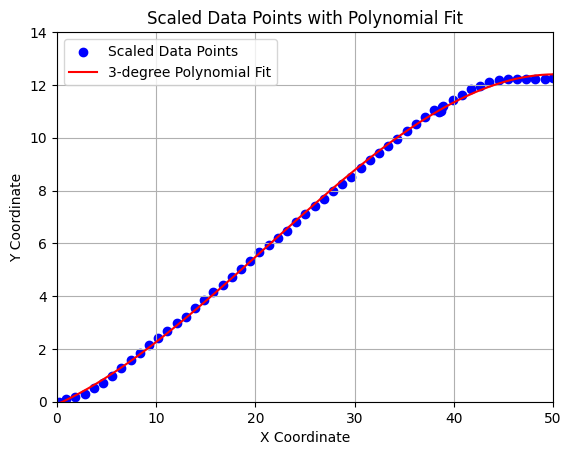

In [226]:
# Perform polynomial fitting (e.g., a 3rd-degree polynomial)
degree = 3
coefficients = np.polyfit(new_x_values, new_y_values, degree)
polynomial = np.poly1d(coefficients)

# Print the polynomial formula
print("Polynomial formula:")
print(polynomial)

# Create the plot
plt.scatter(new_x_values, new_y_values, label='Scaled Data Points', color='blue', marker='o')

# Plot the polynomial fit
x_fit = np.linspace(0, 50, 400)
y_fit = polynomial(x_fit)
plt.plot(x_fit, y_fit, label=f'{degree}-degree Polynomial Fit', color='red')

# Set the x and y axis limits
plt.xlim(0, 50)
plt.ylim(0, 14)

# Set plot title and labels
plt.title('Scaled Data Points with Polynomial Fit')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

# Add a grid
plt.grid(True)

# Add a legend
plt.legend()

# Display the plot
plt.show()

Points on the polynomial curve have been saved to /notebooks/Real plant growth rate curve.csv


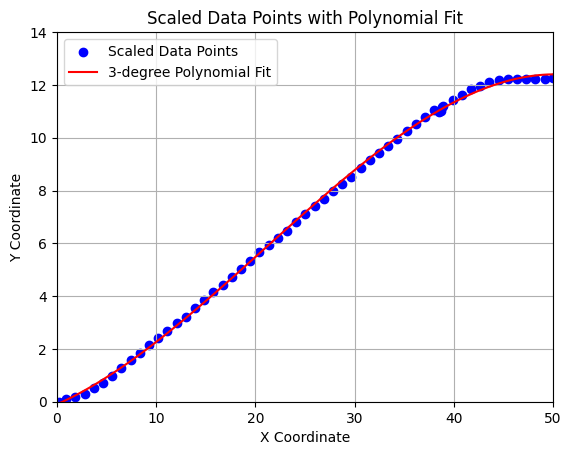

In [229]:
import numpy as np
import matplotlib.pyplot as plt
import csv

# Example usage with detected data points
data_points = [(2, 406), (10, 403), (20, 401), (30, 397), (40, 391), (50, 385), (60, 378), (70, 369), (80, 360), (90, 352),
               (100, 344), (110, 336), (120, 328), (130, 320), (140, 313), (150, 303), (160, 294), (170, 286), (180, 278),
               (190, 269), (200, 260), (210, 251), (220, 242), (230, 234), (240, 226), (250, 218), (260, 209), (270, 200),
               (280, 191), (290, 183), (300, 175), (310, 167), (320, 159), (330, 149), (340, 141), (350, 133), (360, 125),
               (370, 117), (380, 109), (390, 101), (400, 93), (410, 85), (415, 88), (417, 87), (418, 82), (420, 81), 
               (430, 75), (440, 69), (450, 63), (460, 59), (470, 55), (480, 53), (490, 52), (500, 51), (510, 51), (520, 52),
               (530, 51), (539, 50)] 

# Scale data points to fit within the new x and y ranges
refined_data_points = [(x / 539 * 50, y / 406 * 14) for x, y in data_points]

# Generate new x and y values from refined data points
new_x_values = [x for x, _ in refined_data_points]
new_y_values = [y for _, y in refined_data_points]

# Invert the y-values to convert the curve back
new_y_values = [14 - y for y in new_y_values]

# Perform polynomial fitting (e.g., a 3rd-degree polynomial)
degree = 3
coefficients = np.polyfit(new_x_values, new_y_values, degree)
polynomial = np.poly1d(coefficients)

# Generate points on the polynomial curve for every 0.5 unit interval on the x-axis
x_fit = np.arange(0, 50.5, 0.5)
y_fit = polynomial(x_fit)
points_on_curve = list(zip(x_fit, y_fit))

# Save points to a CSV file
csv_filename = "/notebooks/Real plant growth rate curve.csv"
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["X Coordinate", "Y Coordinate"])
    writer.writerows(points_on_curve)

# Create the plot
plt.scatter(new_x_values, new_y_values, label='Scaled Data Points', color='blue', marker='o')

# Plot the polynomial fit
plt.plot(x_fit, y_fit, label=f'{degree}-degree Polynomial Fit', color='red')

# Set the x and y axis limits
plt.xlim(0, 50)
plt.ylim(0, 14)

# Set plot title and labels
plt.title('Scaled Data Points with Polynomial Fit')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

# Add a grid
plt.grid(True)

# Add a legend
plt.legend()

# Display the plot
plt.show()